#Proyecto con Regresion Logistica

In [1]:
#Se importan la librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

##Carga de archivo Pulsar.csv

In [2]:
#Carga del .csv
df = pd.read_csv('Pulsar.csv')

In [3]:
#Se analiza la estructura del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
#Se visualizan las primeras 5 lineas como parte del entendimiento de los datos del DataFrame
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
#Se evaluan las principales estadisticas de cada columna del DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mean_Integrated,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
SD,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
EK,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
Skewness,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
Mean_DMSNR_Curve,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392141
SD_DMSNR_Curve,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
EK_DMSNR_Curve,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
Skewness_DMSNR_Curve,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309330,1191.000837
Class,17898.0,0.091574,0.288432,0.000000,0.000000,0.000000,0.000000,1.000000


In [6]:
#Se cuentan los Nan de la tabla de datos

nan_counts = df.isnull().sum()
print(nan_counts)

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64


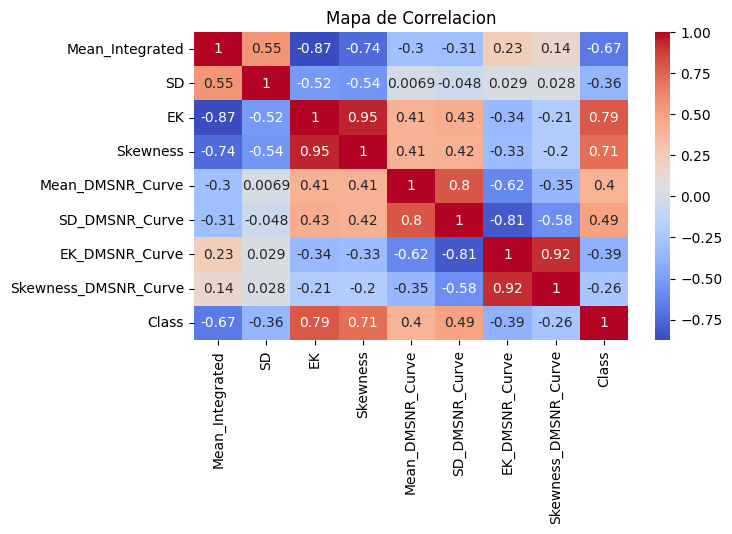

In [7]:
#Se visualiza la correlacion existente entre las variables (columnas) del DataFrame
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Mapa de Correlacion')
plt.show()

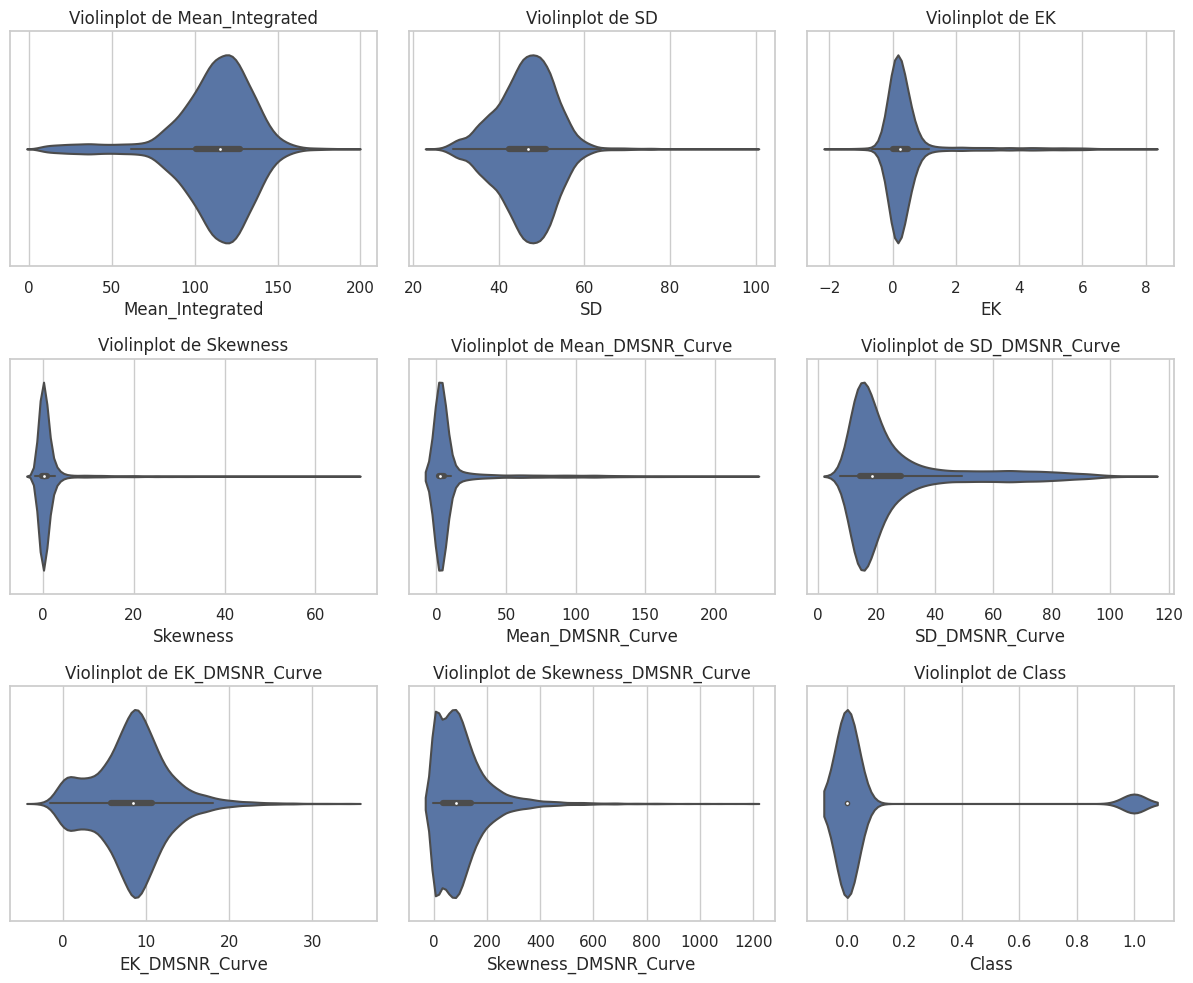

In [8]:
#Analizar la concentracion de los datos
def create_violinplots(dataframe, num_rows, num_cols):
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

    for i, column in enumerate(dataframe.columns):
        row = i // num_cols
        col = i % num_cols
        sns.violinplot(x=dataframe[column], ax=axes[row, col])
        axes[row, col].set_title(f'Violinplot de {column}')

    plt.tight_layout()
    plt.show()

def main():
    num_rows = 3
    num_cols = len(df.columns) // num_rows
    create_violinplots(df, num_rows, num_cols)

main()

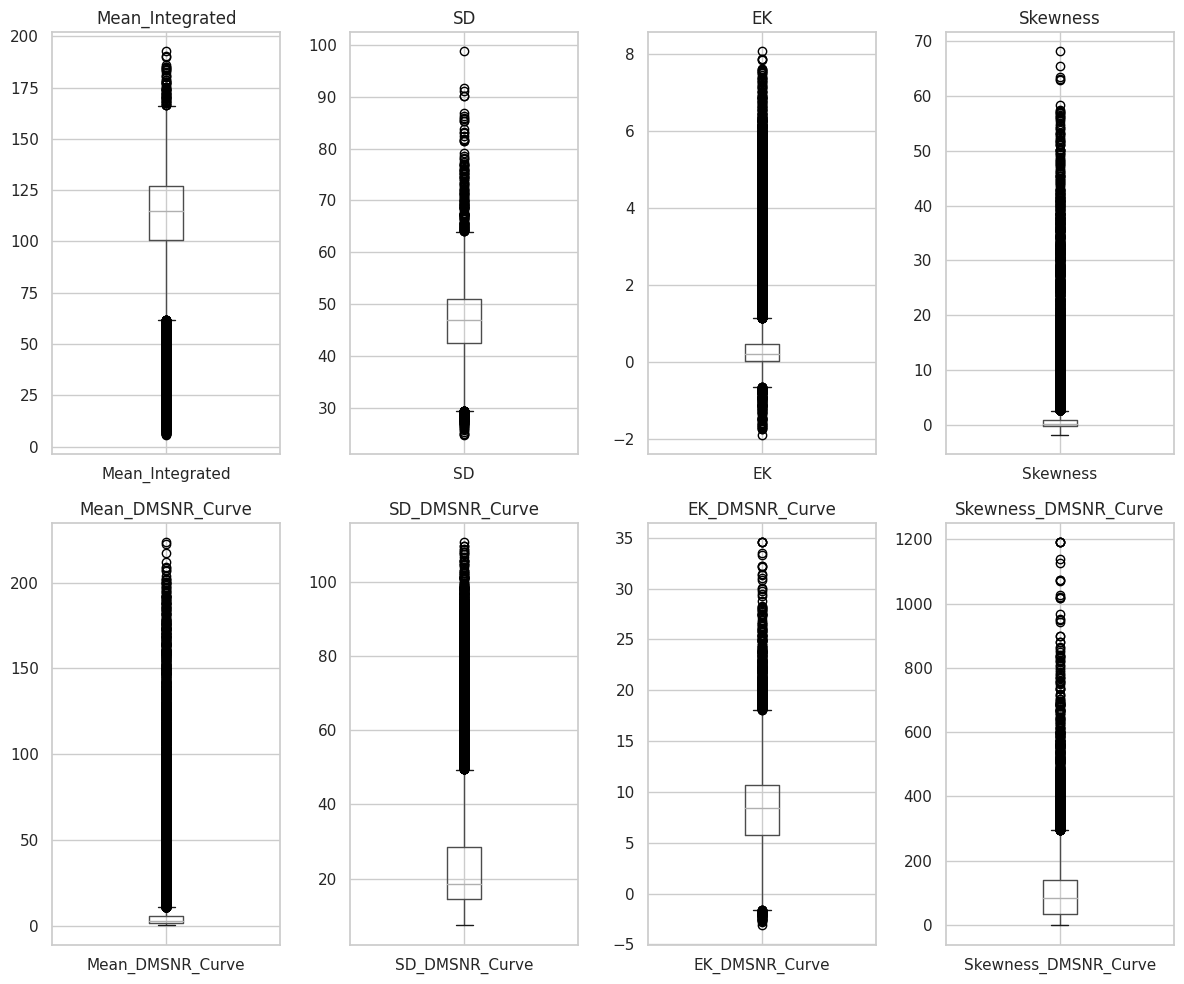

In [9]:
#Se evalua la existencia de outliers

# Obtener las columnas a considerar
columnas = [col for col in df.columns if col != 'Class']

# Calcular el número de filas y columnas para los subplots
num_filas = (len(columnas) + 1) // 4  # Dos subplots por fila
num_columnas = 4

# Crear los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)  # Espacio vertical entre subplots

# Crear los boxplots en cada subplot
for i, columna in enumerate(columnas):
    fila = i // num_columnas
    columna_subplot = i % num_columnas
    ax = axs[fila, columna_subplot]
    df.boxplot(column=columna, ax=ax)
    ax.set_title(f'{columna}')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [10]:
#Funcion para contar los outliers que se muestran en el grafico anterior
def count_outliers(dataframe, column_except, threshold=1.5):
    outlier_count = {}  # Diccionario para almacenar el recuento de outliers por columna

    for column in dataframe.columns:
       if column != column_except and dataframe[column].dtype != 'object':
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
            outlier_count[column] = len(outliers)

    return outlier_count


# Contar outliers en el DataFrame
outliers_count = count_outliers(df, 'Class')

print("Cantidad de outliers por columna:")
for column, count in outliers_count.items():
    print(f"{column}: {count}")

Cantidad de outliers por columna:
Mean_Integrated: 1030
SD: 262
EK: 1596
Skewness: 1901
Mean_DMSNR_Curve: 2927
SD_DMSNR_Curve: 2346
EK_DMSNR_Curve: 487
Skewness_DMSNR_Curve: 901


In [11]:
#Funcion para obtener una copia del dataframe sin considerar los outliers
def remove_outliers_except(dataframe, column_except, threshold=1.5):
    dataframe_cleaned = dataframe.copy()

    for column in dataframe.columns:
        if column != column_except and dataframe[column].dtype != 'object':
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            outliers_indices = dataframe_cleaned[(dataframe_cleaned[column] < lower_bound) | (dataframe_cleaned[column] > upper_bound)].index
            dataframe_cleaned = dataframe_cleaned.drop(outliers_indices)

    return dataframe_cleaned

# Eliminar outliers del DataFrame exceptuando Class
df_cleaned = remove_outliers_except(df, 'Class')

print("DataFrame original:")
print(df.info())

print("\nDataFrame sin outliers:")
print(df_cleaned.info())

DataFrame original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None

DataFrame sin outliers:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13320 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated 

In [12]:
#Evaluar la cantidad de elementos por clase que son eliminado al no considerar los outliers
print(df['Class'].value_counts())
print(df_cleaned['Class'].value_counts())

0    16259
1     1639
Name: Class, dtype: int64
0    13171
1      149
Name: Class, dtype: int64


In [13]:
#Se pierde una gran parte de los datos de la clase 1, por lo que no es viable eliminar los outliers,
#entonces se trabaja con la totalidad de los datos


In [14]:
#Seleccionamos el target y las columnas predictoras
X = df[['EK','Skewness']]
y = df['Class']

In [15]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14318, 2)
(3580, 2)
(14318,)
(3580,)


In [16]:
#Escalar los datos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)  ## Encontrar la media y varianza
X_test = escalar.transform(X_test)

In [17]:
#Creacion y entrenamiento del modelo
model = LogisticRegression()

model.fit(X_train, y_train)  ##Entrenamiento



LogisticRegression()

In [18]:
#Realizamos una predicción
print(X_test.shape)
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred)

## predict_proba(X)

(3580, 2)
(3580,)
[0 1 0 ... 0 0 0]


In [19]:
# Calcular la matriz de confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[3237   15]
 [  63  265]]


In [20]:
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9464285714285714


In [21]:
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9782122905027933


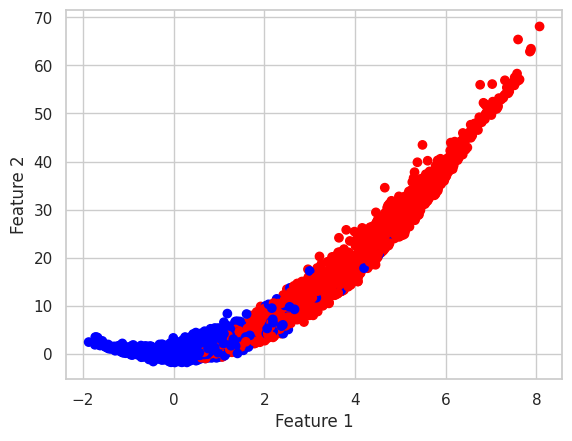

In [22]:
atributo_A = 0
atributo_B = 1

import matplotlib.pyplot as plt
# Visualizar los resultados en un gráfico de dispersión
plt.scatter(X.values[:, atributo_A], X.values[:, atributo_B], c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Crear una malla para visualizar la frontera de decisión
x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

[[-2.87601118 -2.79188598]
 [-2.75534923 -2.79188598]
 [-2.63468728 -2.79188598]
 ...
 [ 8.82819814 69.10162173]
 [ 8.94886009 69.10162173]
 [ 9.06952205 69.10162173]]
4687


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


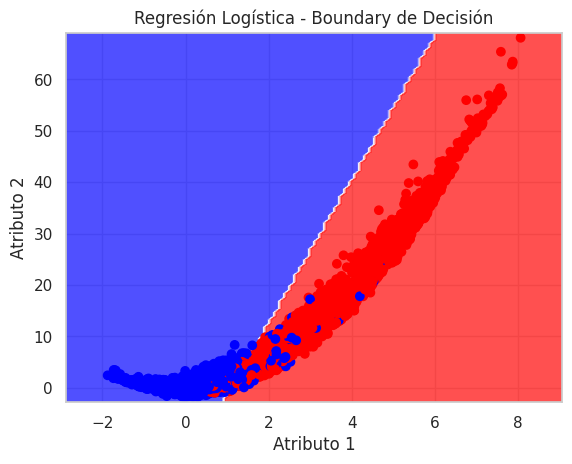

In [23]:
# Generar una malla de puntos para representar la frontera de decisión
x_min, x_max = X.values[:, atributo_A].min() - 1, X.values[:, atributo_A].max() + 1
y_min, y_max = X.values[:, atributo_B].min() - 1, X.values[:, atributo_B].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

print(np.c_[xx.ravel(), yy.ravel()])

# Obtener las predicciones para cada punto en la malla
Z = model.predict(escalar.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
print(np.count_nonzero(Z == 1))

# Graficar el contorno de la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')

# Graficar los puntos de datos
plt.scatter(X.values[:, atributo_A], X.values[:, atributo_B], c=y, cmap='bwr')

# Etiquetas y título del gráfico
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.title('Regresión Logística - Boundary de Decisión')

# Mostrar el gráfico
plt.show()

In [67]:
import pickle

# Guardar el modelo en un archivo
with open('modelo_logist.pkl', 'wb') as archivo:
    pickle.dump(model, archivo)